In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('../input/early-stage-diabetesucl/diabetes_data_upload.csv')

In [4]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
data['class']=data['class'].replace({'Positive':1,'Negative':0})

In [6]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,1
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,1
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,1
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,1
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,1
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,0


In [39]:
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [10]:
data.iloc[:,1:15]

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia
0,1,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes
1,1,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes
2,1,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes
3,1,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No
4,1,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No
516,0,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No
517,0,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No
518,0,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes


In [11]:
for cat_data in data.iloc[:,1:15]:
    print(cat_data)

Gender
Polyuria
Polydipsia
sudden weight loss
weakness
Polyphagia
Genital thrush
visual blurring
Itching
Irritability
delayed healing
partial paresis
muscle stiffness
Alopecia


In [4]:
from sklearn.preprocessing import LabelEncoder
for cat_data in data.iloc[:,1:16]:
            i=0
            l='l'+str(i)
            l=LabelEncoder()
            data[cat_data]=l.fit_transform(data[cat_data])
            i+=1

In [5]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [24]:
a=[]
a.append(d[1])
a.append(d[0])

<BarContainer object of 2 artists>

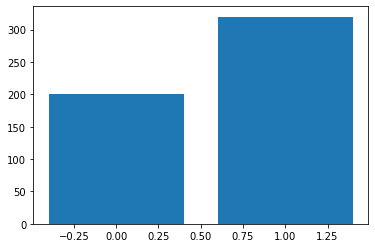

In [27]:
plt.bar([1,0],a)

In [6]:
X=data.drop('class',axis=1)
Y=data['class']


In [7]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X=s.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
clf=[RandomForestClassifier(),AdaBoostClassifier(),LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]

In [24]:
sc=[]
sc_test=[]
for cl in clf:
    model=cl
    model.fit(X_train,Y_train)
    sc.append(model.score(X_train,Y_train))
    sc_test.append(model.score(X_test,Y_test))

In [25]:
sc

[1.0,
 0.9512820512820512,
 0.9512820512820512,
 0.9897435897435898,
 1.0,
 0.958974358974359]

In [26]:
sc_test

[0.9615384615384616,
 0.9,
 0.9,
 0.9384615384615385,
 0.9538461538461539,
 0.9230769230769231]

In [31]:
modeldc=DecisionTreeClassifier()
modeldc.fit(X_train,Y_train)
modeldc.score(X_train,Y_train)

1.0

In [32]:
modeldc.score(X_test,Y_test)

0.9538461538461539

In [33]:
Y_pred=modeldc.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
classification_report(Y_pred,Y_test)
confusion_matrix(Y_pred,Y_test)

array([[56,  3],
       [ 3, 68]])

In [40]:
modeldc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [41]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {'criterion' :['gini', 'entropy'],'max_depth': [4,6,8,12]}

In [48]:
search = GridSearchCV(modeldc, param_grid, cv=5)
search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 12]})

In [49]:
search.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [ ]:
search.score(X_test,Y_test)